In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Things To Consider

Sunlight and humidity levels influence the production of orchids.

1. When sunlight exposure is less than 7 hours a day, production will decrease with 4% for every 10 minutes
    - Average sunlight per hour is 2500 units
    - So when sunlight units is less than 7 x 2_500 = 17_500, then production will decrease
2. Ideal humidity is between 60% to 80%:
    - Outside those limits, production will fall 2% for every 5% in humidity change
3. Import/Export tariffs
4. Storage Costs

In [2]:
!dir "../csv/round-2-island-data-bottle/"

 Volume in drive C is Windows
 Volume Serial Number is 4C9C-5B8B

 Directory of C:\Users\joshu\Documents\Code\prosperity2\csv\round-2-island-data-bottle

2024-04-12  02:59 PM    <DIR>          .
2024-04-12  02:59 PM    <DIR>          ..
2024-04-12  02:59 PM           509,742 prices_round_2_day_-1.csv
2024-04-12  02:59 PM           498,397 prices_round_2_day_0.csv
2024-04-12  02:59 PM           497,555 prices_round_2_day_1.csv
               3 File(s)      1,505,694 bytes
               2 Dir(s)  47,020,564,480 bytes free


In [3]:
pricesByDay = {}
for day in [-1, 0, 1]:
    pricesByDay[day] = pd.read_csv(f"../csv/round-2-island-data-bottle/prices_round_2_day_{day}.csv", sep=';')

In [21]:
pricesByDay[-1].describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ORCHIDSNEXT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,499950.000000,1208.802825,1.400110,10.071200,-2.590180,3619.722078,85.621670,-1.0,1208.805625
std,288689.567991,22.074064,0.195997,1.397561,0.280163,549.005581,4.946369,0.0,22.074723
min,0.000000,1146.750000,1.100000,8.500000,-3.600000,2471.594000,74.912860,-1.0,1146.750000
25%,249975.000000,1195.750000,1.200000,9.500000,-2.600000,3164.641275,82.979275,-1.0,1195.750000
50%,499950.000000,1209.750000,1.400000,9.500000,-2.600000,3666.796300,85.795460,-1.0,1209.750000
75%,749925.000000,1222.750000,1.500000,10.500000,-2.400000,4027.181300,88.585189,-1.0,1222.750000
max,999900.000000,1257.250000,2.100000,16.000000,-2.000000,4513.986300,95.209755,-1.0,1257.250000


In [5]:
pricesByDay[0].describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0
mean,500000.000000,1041.251175,1.384912,9.961154,-2.570763,2279.533353,74.036523,0.0
std,288718.435504,45.142712,0.193678,1.584335,0.349321,813.568530,10.199225,0.0
min,0.000000,960.750000,1.100000,8.500000,-4.200000,1397.304900,59.999580,0.0
25%,250000.000000,1001.750000,1.300000,9.500000,-2.600000,1811.042400,67.049130,0.0
50%,500000.000000,1039.250000,1.300000,9.500000,-2.600000,2000.000000,70.277214,0.0
75%,750000.000000,1083.250000,1.500000,10.500000,-2.400000,2400.000000,83.000000,0.0
max,1000000.000000,1122.000000,2.100000,19.500000,-2.000000,4500.338000,95.000000,0.0


In [6]:
pricesByDay[1].describe()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.0
mean,500000.000000,1060.797645,0.926107,9.151935,-5.054445,2431.936381,77.562755,1.0
std,288718.435504,29.101624,0.164156,0.807551,0.546315,676.201827,8.010117,0.0
min,0.000000,1009.250000,0.700000,7.500000,-6.500000,1669.296600,67.536980,1.0
25%,250000.000000,1038.750000,0.800000,8.500000,-5.500000,1951.776000,72.174774,1.0
50%,500000.000000,1053.750000,0.900000,9.500000,-5.000000,2219.208300,74.889440,1.0
75%,750000.000000,1080.750000,1.000000,9.500000,-4.500000,2608.087400,79.031670,1.0
max,1000000.000000,1133.250000,1.700000,13.500000,-4.500000,4219.218000,97.513270,1.0


In [7]:
# Predict the orchids value in next timestamp

for day in [-1, 0, 1]:
    df = pricesByDay[day]
    df['ORCHIDSNEXT'] = df['ORCHIDS'].shift(-1)
    pricesByDay[day] = df.iloc[:-1]

In [22]:
colName = 'ORCHIDS'
(pricesByDay[-1][colName].sum() + pricesByDay[0][colName].sum() + pricesByDay[1][colName].sum()) / (pricesByDay[-1].shape[0] + pricesByDay[0].shape[0] + pricesByDay[1].shape[0])

1103.6199166666668

In [8]:
pricesByDay[-1].tail()

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,ORCHIDSNEXT
9995,999500,1228.75,1.4,8.5,-3.0,3902.4468,83.032240,-1,1227.75
9996,999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1,1226.75
9997,999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1,1227.75
9998,999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1,1228.00
9999,999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1,1228.00


In [9]:
cols = [
    'ORCHIDS',
    'TRANSPORT_FEES',
    'EXPORT_TARIFF',
    'IMPORT_TARIFF',
    'SUNLIGHT',
    'HUMIDITY',
    'ORCHIDSNEXT'
]

In [10]:
modified_pricesByDay = {}

for day in [-1, 0, 1]:
    modified_pricesByDay[day] = pricesByDay[day].loc[:, cols].copy()

modified_pricesByDay[-1].head()

,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,ORCHIDSNEXT
0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,1201.75
1,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,1201.75
2,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,1201.75
3,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,1201.75
4,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,1200.25


In [11]:
X_day, y_day = {}, {}
for day in [-1, 0, 1]:
    X_day[day] = modified_pricesByDay[day].iloc[:, :-1].to_numpy()
    y_day[day] = modified_pricesByDay[day].iloc[:, [-1]].to_numpy()


In [12]:
X_day[-1][:5], y_day[-1][:5]

(array([[ 1.2000000e+03,  1.5000000e+00,  1.0500000e+01, -2.0000000e+00,
          2.5000000e+03,  7.9000000e+01],
        [ 1.2017500e+03,  1.5000000e+00,  9.5000000e+00, -2.0000000e+00,
          2.4994197e+03,  7.9004100e+01],
        [ 1.2017500e+03,  1.5000000e+00,  9.5000000e+00, -2.0000000e+00,
          2.4988457e+03,  7.9008210e+01],
        [ 1.2017500e+03,  1.5000000e+00,  9.5000000e+00, -2.0000000e+00,
          2.4982780e+03,  7.9012340e+01],
        [ 1.2017500e+03,  1.5000000e+00,  9.5000000e+00, -2.0000000e+00,
          2.4977166e+03,  7.9016490e+01]]),
 array([[1201.75],
        [1201.75],
        [1201.75],
        [1201.75],
        [1200.25]]))

In [13]:
X_combined = np.concatenate([X_day[i] for i in [-1, 0, 1]])
y_combined = np.concatenate([y_day[i] for i in [-1, 0, 1]])

In [14]:
X_combined.shape, y_combined.shape

((30000, 6), (30000, 1))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm_day = {}
for day in [-1, 0, 1]:
    lm_day[day] = LinearRegression().fit(X_day[day], y_day[day])
    print(f"Day {day}: intercept = {lm_day[day].intercept_}\n\t coef = {lm_day[day].coef_}\n")
    
lm_combined = LinearRegression().fit(X_combined, y_combined)
print(f"Combined: intercept = {lm_combined.intercept_}\n\t coef = {lm_combined.coef_}\n")

Day -1: intercept = [2.37385736]
	 coef = [[9.97581796e-01 3.90973335e-02 6.10237333e-06 2.13058665e-02
  5.42280630e-05 4.15978456e-03]]

Day 0: intercept = [1.54410778]
	 coef = [[ 9.98120010e-01 -1.09455279e-01  2.33860715e-02  2.79407389e-02
   2.21718797e-05  4.60262185e-03]]

Day 1: intercept = [1.45616804]
	 coef = [[ 9.98372618e-01  1.56943333e-01 -1.85791023e-02 -1.35174648e-02
   4.90294647e-06  2.68553807e-03]]

Combined: intercept = [0.06987954]
	 coef = [[ 9.99711443e-01  1.09677694e-02  6.46992420e-03 -2.80465300e-03
   1.75439458e-05  1.37126605e-03]]



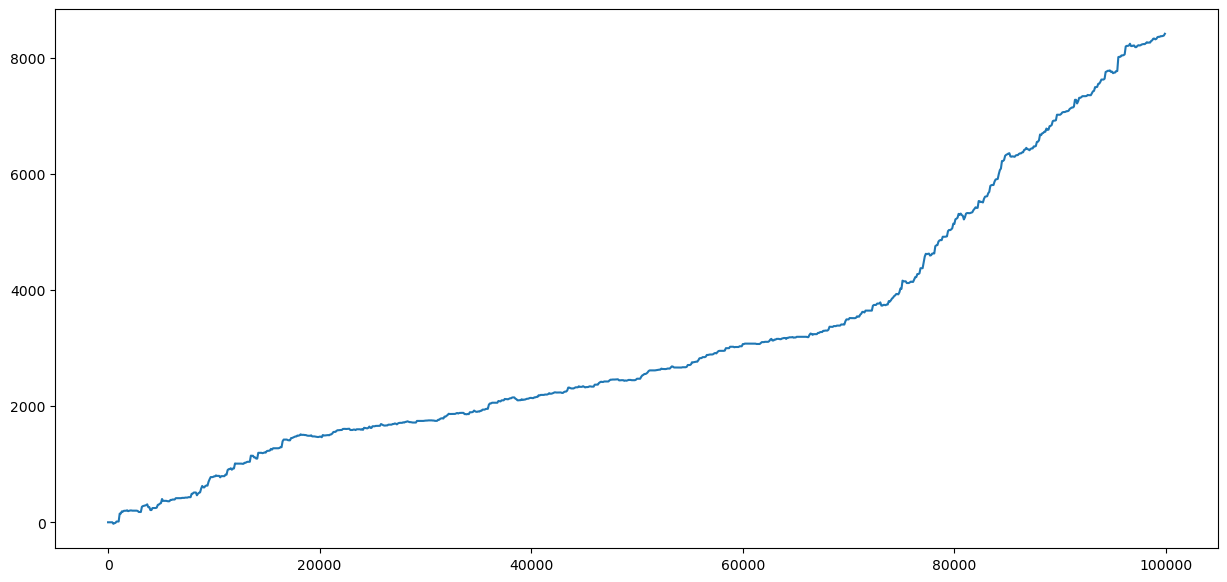

In [19]:
df = pd.read_csv("~/Downloads/6ee2ee50-a211-44ca-af1a-5391d070c437.csv", sep=';')

mask = (df['product'] == "ORCHIDS")
df_orchids = df[mask]
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(df_orchids.timestamp, df_orchids.profit_and_loss)

In [20]:
df_orchids.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
2986,1,99500,ORCHIDS,1067,5,1066.0,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5,8367.978516
2988,1,99600,ORCHIDS,1068,7,1067.0,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5,8367.978516
2991,1,99700,ORCHIDS,1068,5,1067.0,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0,8371.579102
2996,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,8378.778320
2998,1,99900,ORCHIDS,1067,7,1066.0,4.0,1059.0,49.0,1074,7,1075.0,4.0,1081.0,49.0,1070.5,8409.578125
